# Car Data Analysis 
## by Vikram Jeet Singh

### Aim: To analyse the data and get different results from the data, like most fuel efficient car, etc.

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st
print('Libraries Imported Succesfully')

Libraries Imported Succesfully


### Importing data

In [2]:
path='C:\\Users\\Vikram\\Desktop\\Car Sales Data.csv'
data=pd.read_csv(path)
data.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


### Analyzing the data

In [3]:
#checking dimensions of data
print('Dimensions of dataset:{}'.format(data.shape))

Dimensions of dataset:(157, 16)


In [4]:
#Duplicated values
print('Duplicated values:{}'.format(data.duplicated().sum()))

Duplicated values:0


In [5]:
#NULL values
print('NUll values per column:\n{}'.format(data.isnull().sum()),'\n','-'*75)

NUll values per column:
Manufacturer            0
Model                   0
Sales_in_thousands      0
__year_resale_value    36
Vehicle_type            0
Price_in_thousands      2
Engine_size             1
Horsepower              1
Wheelbase               1
Width                   1
Length                  1
Curb_weight             2
Fuel_capacity           1
Fuel_efficiency         3
Latest_Launch           0
Power_perf_factor       2
dtype: int64 
 ---------------------------------------------------------------------------


##### As we can see that there are missing values in many columns, so we will have to clean the data after analysis

In [6]:
#Schema of dataset
print('Schema of dataset',data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    object 
 1   Model                157 non-null    object 
 2   Sales_in_thousands   157 non-null    float64
 3   __year_resale_value  121 non-null    float64
 4   Vehicle_type         157 non-null    object 
 5   Price_in_thousands   155 non-null    float64
 6   Engine_size          156 non-null    float64
 7   Horsepower           156 non-null    float64
 8   Wheelbase            156 non-null    float64
 9   Width                156 non-null    float64
 10  Length               156 non-null    float64
 11  Curb_weight          155 non-null    float64
 12  Fuel_capacity        156 non-null    float64
 13  Fuel_efficiency      154 non-null    float64
 14  Latest_Launch        157 non-null    object 
 15  Power_perf_factor    155 non-null    flo

##### From the above information we can see that all the columns are having the right datatype and there is no need to change the datatype of any column.

In [7]:
#Discriptive analysis of data
print('Discriptive analysis of data')
data.describe(include='all')

Discriptive analysis of data


,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
count,157,157,157.000000,121.000000,157,155.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000,156.000000,154.000000,157,155.000000
unique,30,156,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,130,NaN
top,Ford,Neon,NaN,NaN,Passenger,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10/5/2012,NaN
freq,11,2,NaN,NaN,116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN
mean,NaN,NaN,52.998076,18.072975,NaN,27.390755,3.060897,185.948718,107.487179,71.150000,187.343590,3.378026,17.951923,23.844156,NaN,77.043591
std,NaN,NaN,68.029422,11.453384,NaN,14.351653,1.044653,56.700321,7.641303,3.451872,13.431754,0.630502,3.887921,4.282706,NaN,25.142664
min,NaN,NaN,0.110000,5.160000,NaN,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000,NaN,23.276272
25%,NaN,NaN,14.114000,11.260000,NaN,18.017500,2.300000,149.500000,103.000000,68.400000,177.575000,2.971000,15.800000,21.000000,NaN,60.407707
50%,NaN,NaN,29.450000,14.180000,NaN,22.799000,3.000000,177.500000,107.000000,70.550000,187.900000,3.342000,17.200000,24.000000,NaN,72.030917
75%,NaN,NaN,67.956000,19.875000,NaN,31.947500,3.575000,215.000000,112.200000,73.425000,196.125000,3.799500,19.575000,26.000000,NaN,89.414878


In [8]:
#Correlation of data
print('Descibing Correlation of data')
data.corr()

Descibing Correlation of data


,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
Sales_in_thousands,1.000000,-0.279034,-0.304734,0.019983,-0.197756,0.358179,0.140918,0.254980,0.008628,0.086540,-0.016764,-0.223252
__year_resale_value,-0.279034,1.000000,0.953840,0.531330,0.769081,-0.052270,0.178767,0.026548,0.361557,0.325567,-0.399880,0.827123
Price_in_thousands,-0.304734,0.953840,1.000000,0.626875,0.839744,0.110513,0.329136,0.156935,0.526224,0.423282,-0.492157,0.897945
Engine_size,0.019983,0.531330,0.626875,1.000000,0.837360,0.472130,0.690398,0.541424,0.760043,0.663022,-0.734622,0.818528
Horsepower,-0.197756,0.769081,0.839744,0.837360,1.000000,0.286308,0.539158,0.393364,0.610131,0.499907,-0.611332,0.992994
Wheelbase,0.358179,-0.052270,0.110513,0.472130,0.286308,1.000000,0.683135,0.839639,0.651016,0.654044,-0.497931,0.258852
Width,0.140918,0.178767,0.329136,0.690398,0.539158,0.683135,1.000000,0.710435,0.720927,0.656302,-0.602546,0.512025
Length,0.254980,0.026548,0.156935,0.541424,0.393364,0.839639,0.710435,1.000000,0.627163,0.563540,-0.446756,0.354095
Curb_weight,0.008628,0.361557,0.526224,0.760043,0.610131,0.651016,0.720927,0.627163,1.000000,0.863968,-0.818402,0.612071
Fuel_capacity,0.086540,0.325567,0.423282,0.663022,0.499907,0.654044,0.656302,0.563540,0.863968,1.000000,-0.801512,0.501184


##### From the above correlation of data we can see that there is a direct relationship between a few values and an inverse relationship between some. We will use this information in the further future.

### Handling missing values

In [9]:
#Handling missing values for column '__year_resale_value'
data['__year_resale_value'].isnull().sum()

36

##### As we can see that there are 36 missing values, so, we cannot completely delete all the rows with missing values. The best approach here is to fill the missing columns with mean value of the column, so that we get an average Resale value for each missing column.

In [10]:
mean=data['__year_resale_value'].mean()
data['__year_resale_value']=data['__year_resale_value'].fillna(mean)
data['__year_resale_value']

0      16.360000
1      19.875000
2      18.225000
3      29.725000
4      22.255000
         ...    
152    18.072975
153    18.072975
154    18.072975
155    18.072975
156    18.072975
Name: __year_resale_value, Length: 157, dtype: float64

##### Hence, the missing values of the column '__year_resale_value' have been replaced with mean value of the column.

In [11]:
#Handling missing values for column 'Price_in_thousands'
data[data['Price_in_thousands'].isnull()]

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.47,17.2,26.0,1/4/2012,NaN
33,Chrysler,Town & Country,53.480,19.540,Car,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7/13/2011,NaN


##### We have two missing values for the column 'Price_in_thousands' , so lets fill these empty values with the mean of the column.

In [12]:
data['Price_in_thousands']=data['Price_in_thousands'].fillna(st.mode(data['Price_in_thousands']))
data['Price_in_thousands'].isnull().sum()

0

##### Hence, the missing values of the column 'Price_in_thousands' have been replaced with mode value of the column.

#### Applying the same approach of filling the missing values of the data by some measure of central tendency.

In [13]:
#Filling missing values in column 'Engine_size' with the modal value
data['Engine_size']=data['Engine_size'].fillna(st.mode(data['Engine_size']))
print('Hence, there are ',data['Engine_size'].isnull().sum(),'null values in the column Engine_size')

Hence, there are  0 null values in the column Engine_size


In [14]:
#Filling missing values in column 'Horsepower' with the modal value
data['Horsepower']=data['Horsepower'].fillna(st.mode(data['Horsepower']))
print('Hence, there are ',data['Horsepower'].isnull().sum(),'null values in the column Horsepower')

Hence, there are  0 null values in the column Horsepower


In [15]:
#Filling missing values in column 'Wheelbase' with the modal value
data['Wheelbase']=data['Wheelbase'].fillna(st.mode(data['Wheelbase']))
print('Hence, there are ',data['Wheelbase'].isnull().sum(),'null values in the column Wheelbase')

Hence, there are  0 null values in the column Wheelbase


In [16]:
#Filling missing values in column 'Width' with the modal value
data['Width']=data['Width'].fillna(st.mode(data['Width']))
print('Hence, there are ',data['Width'].isnull().sum(),'null values in the column Width')

Hence, there are  0 null values in the column Width


In [17]:
#Filling missing values in column 'Length' with the modal value
data['Length']=data['Length'].fillna(st.mode(data['Length']))
print('Hence, there are ',data['Length'].isnull().sum(),'null values in the column Length')

Hence, there are  0 null values in the column Length


In [18]:
#Filling missing values in column 'Curb_weight' with the modal value
data['Curb_weight']=data['Curb_weight'].fillna(st.mode(data['Curb_weight']))
print('Hence, there are ',data['Curb_weight'].isnull().sum(),'null values in the column Curb_weight')

Hence, there are  0 null values in the column Curb_weight


In [19]:
#Filling missing values in column 'Fuel_capacity' with the modal value
data['Fuel_capacity']=data['Fuel_capacity'].fillna(st.mode(data['Fuel_capacity']))
print('Hence, there are ',data['Fuel_capacity'].isnull().sum(),'null values in the column Fuel_capacity')

Hence, there are  0 null values in the column Fuel_capacity


In [20]:
#Filling missing values in column 'Fuel_efficiency' with the modal value
data['Fuel_efficiency']=data['Fuel_efficiency'].fillna(st.mode(data['Fuel_efficiency']))
print('Hence, there are ',data['Fuel_efficiency'].isnull().sum(),'null values in the column Fuel_efficiency')

Hence, there are  0 null values in the column Fuel_efficiency


In [21]:
#Filling missing values in column 'Power_perf_factor' with the modal value
data['Power_perf_factor']=data['Power_perf_factor'].fillna(st.mode(data['Power_perf_factor']))
print('Hence, there are ',data['Power_perf_factor'].isnull().sum(),'null values in the column Power_perf_factor')

Hence, there are  0 null values in the column Power_perf_factor


In [22]:
#checking if there is any missing value left in the data.
data.isnull().sum()

Manufacturer           0
Model                  0
Sales_in_thousands     0
__year_resale_value    0
Vehicle_type           0
Price_in_thousands     0
Engine_size            0
Horsepower             0
Wheelbase              0
Width                  0
Length                 0
Curb_weight            0
Fuel_capacity          0
Fuel_efficiency        0
Latest_Launch          0
Power_perf_factor      0
dtype: int64

##### Hence, there are no null values in the data. Our data is completely clean now. Now we can perform EDA on the data.

### Exploratory Data Analysis(EDA)

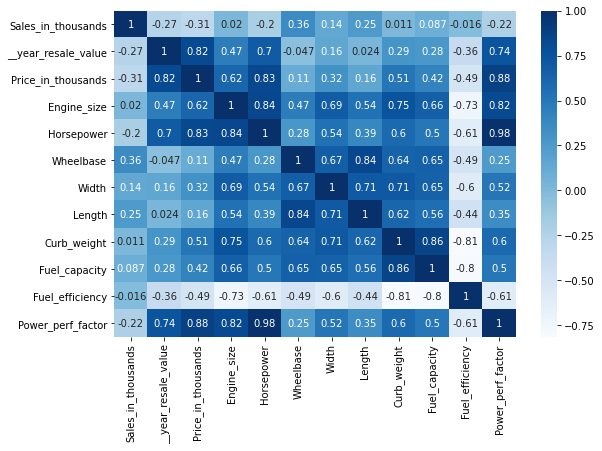

In [23]:
#Correlaion Matrix
plt.figure(figsize=(9,6))
correlation=data.corr()
sns.heatmap(data=correlation,annot=True,cmap='Blues')

##### The graph above shows the correlation between the columns of the data and the values of thier coefficients. The positive values of coefficients say that the columns are directly proportional and negative values tell that the values are indirectly proportional.

### Now lets see which  car company does the best sales

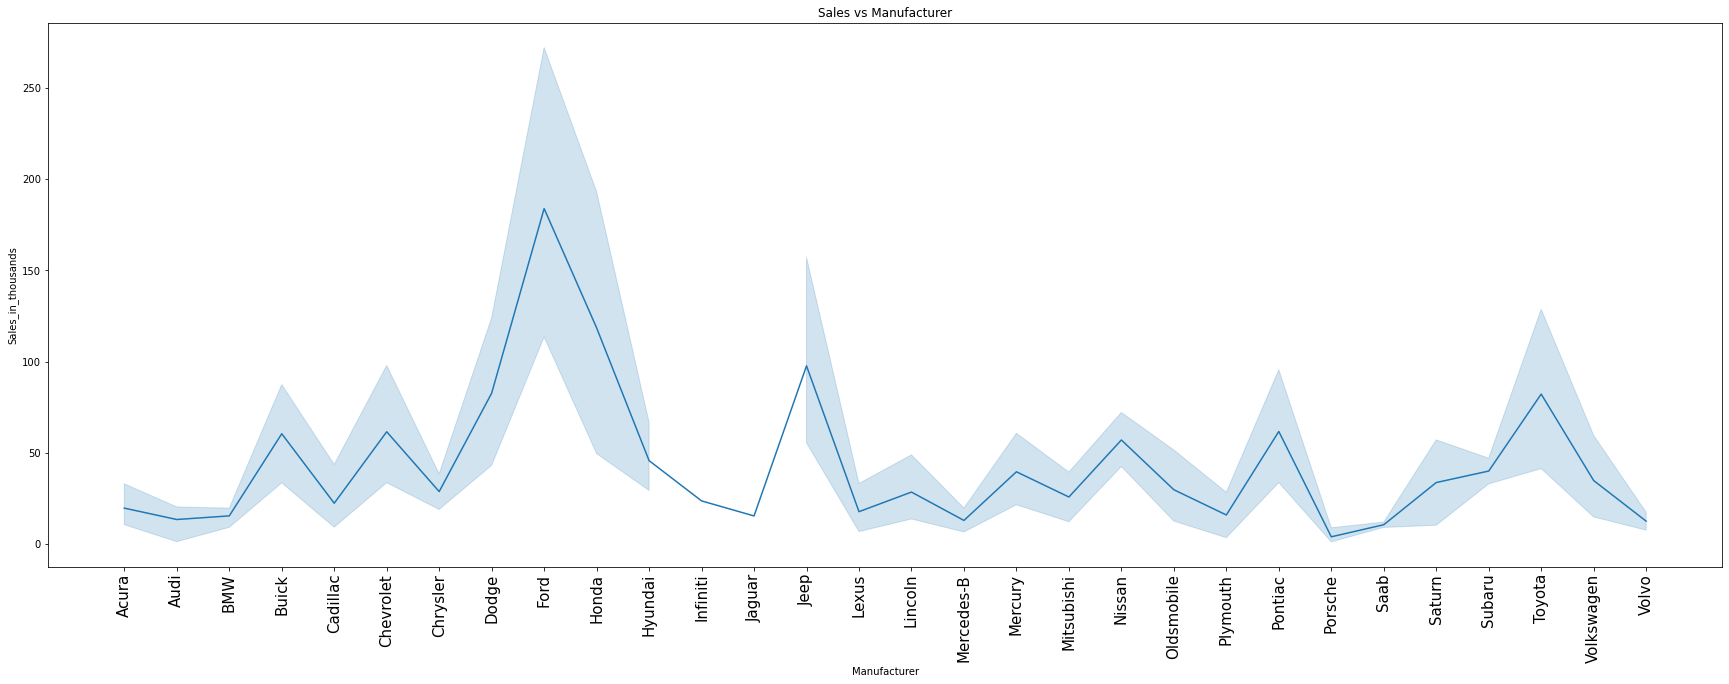

In [24]:
#Manufacturer vs sales
plt.figure(figsize=(30,10))
sns.lineplot(x='Manufacturer',y='Sales_in_thousands',data=data)
plt.xticks(fontsize=15,rotation=90)
plt.title('Sales vs Manufacturer')
plt.show()

##### From the graph above we can see that the cars of 'Ford' company have made the most sales.

### Now let's see which model of the Ford company has made the most sales.

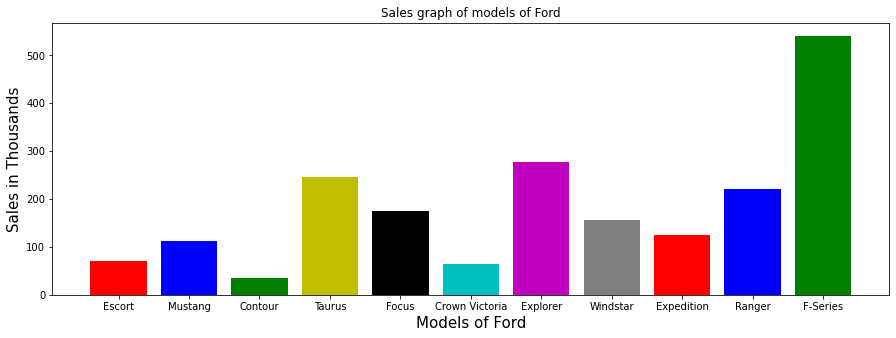

In [25]:
#Models of Ford vs sales
%matplotlib inline
plt.figure(figsize=(15,5))
dt=data[data['Manufacturer']=='Ford']
plt.bar(dt['Model'],dt['Sales_in_thousands'],color=['r','b','g','y','k','c','m','grey'])
plt.xlabel('Models of Ford',fontsize=15)
plt.ylabel('Sales in Thousands',fontsize=15)
plt.title('Sales graph of models of Ford')
plt.show()

##### From the graph above, we can see that the car which made the most sales from the data is Ford's F-Series.

### Now let's see which type of Vehicles made the most sales

Text(0.5, 1.0, 'Vehicle Type Sales')

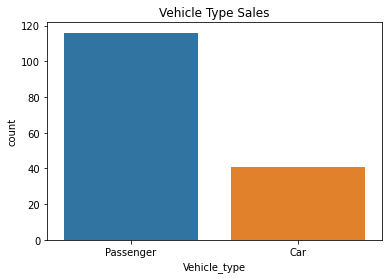

In [26]:
sns.countplot(data['Vehicle_type'])
plt.title('Vehicle Type Sales')

##### From the graph above we can see that the Passenger vehicles made the most sales.

### Which company has the most expensive cars.

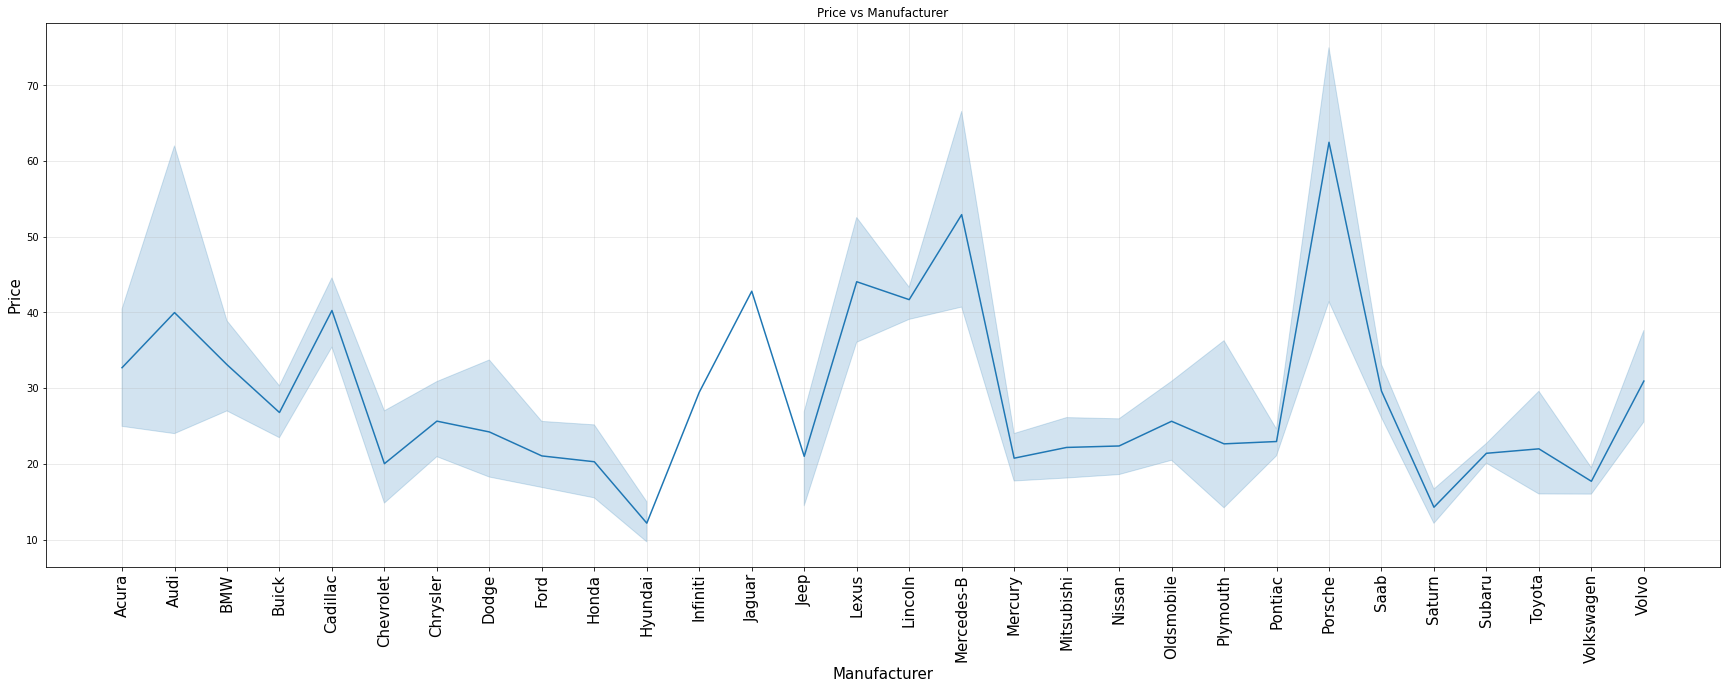

In [27]:
#Manufacturer vs price
plt.figure(figsize=(30,10))
sns.lineplot(x='Manufacturer',y='Price_in_thousands',data=data)
plt.xticks(fontsize=15,rotation=90)
plt.title('Price vs Manufacturer')
plt.xlabel('Manufacturer',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.grid(alpha=0.3)
plt.show()

##### From the graph above we can see that the price of cars of 'Porsche' company is the highest and the price of cars of 'Hyundai' company is the least.

### Which model of the 'Porsche' is most expensive

In [28]:
data[data['Manufacturer']=='Porsche']

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
124,Porsche,Boxter,8.982,41.250,Passenger,41.43,2.7,217.0,95.2,70.1,171.0,2.778,17.0,22.0,2/19/2012,93.437331
125,Porsche,Carrera Coupe,1.280,60.625,Passenger,71.02,3.4,300.0,92.6,69.5,174.5,3.032,17.0,21.0,12/21/2012,134.390975
126,Porsche,Carrera Cabrio,1.866,67.550,Passenger,74.97,3.4,300.0,92.6,69.5,174.5,3.075,17.0,23.0,7/11/2011,135.914710


##### From here we can observe that the model 'Carrera Cabrio' is the most expensive car in the data having price of 74.97 Thousands.

### Which company's car is has the best Fuel_efficiency

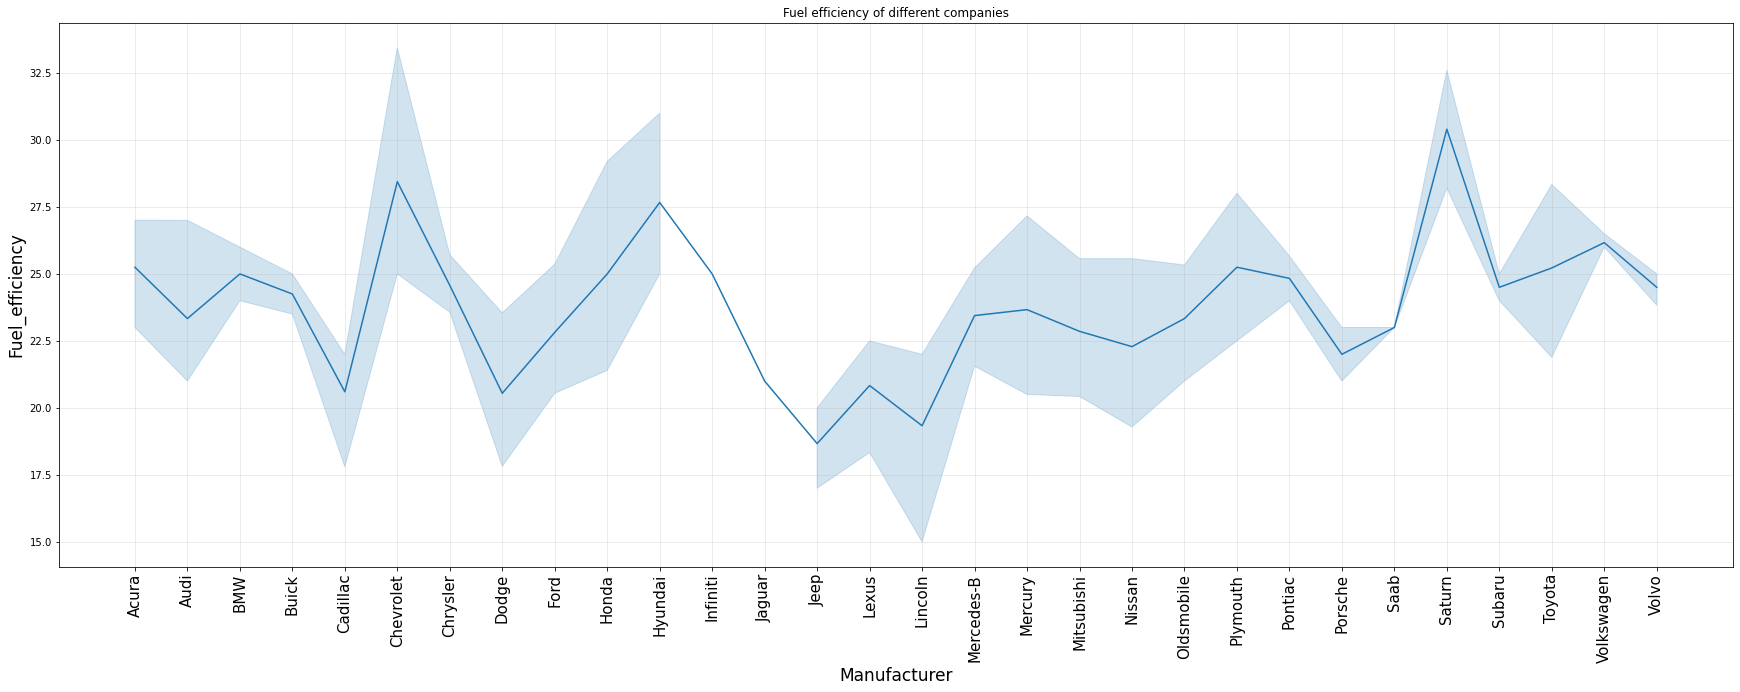

In [34]:
#Fuel_efficiency vs Manufacturer
plt.figure(figsize=(30,10))
sns.lineplot(x='Manufacturer',y='Fuel_efficiency',data=data)
plt.title('Fuel efficiency of different companies')
plt.xticks(fontsize=15,rotation=90)
plt.grid(alpha=0.3)
plt.xlabel('Manufacturer',fontsize=17)
plt.ylabel('Fuel_efficiency',fontsize=17)
plt.show()

##### From the graph above we can see that the cars of 'Saturn' company are the most fuel efficient cars.

### Which car model of 'Saturn' car company is most fuel efficient.

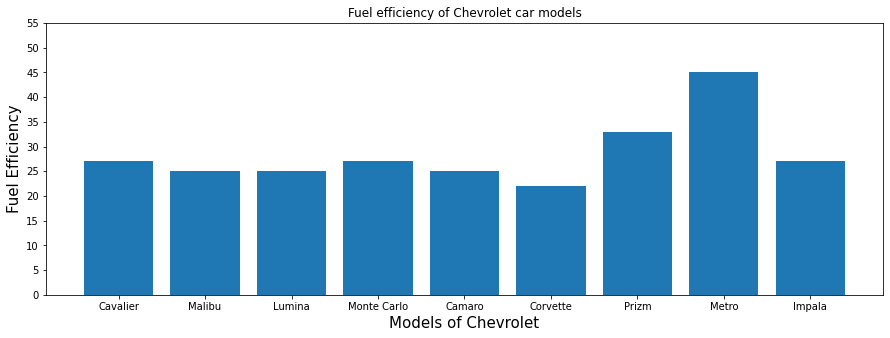

In [52]:
#Model vs Fuel Efficiency
%matplotlib inline
plt.figure(figsize=(15,5))
t=data[data['Manufacturer']=='Chevrolet']
plt.bar(t['Model'],t['Fuel_efficiency'])
plt.xlabel('Models of Chevrolet',fontsize=15)
plt.ylabel('Fuel Efficiency',fontsize=15)
plt.yticks([0,5,10,15,20,25,30,35,40,45,50,55])
plt.title('Fuel efficiency of Chevrolet car models')
plt.show()

##### From the graph above we can observe that the 'Metro' model of 'Chevrolet' company is the most fuel efficient car model.